In [1]:
import warnings

from CNN import CNN

warnings.filterwarnings("ignore")

2023-12-23 00:57:54.218549: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-23 00:57:54.255652: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 00:57:54.255682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 00:57:54.256484: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 00:57:54.264096: I tensorflow/core/platform/cpu_feature_guar

In [2]:
try:
    del model
    print("clean!")
except:
    pass
model = CNN((128, 128, 1))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

2023-12-23 00:57:55.428969: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-23 00:57:55.450637: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-23 00:57:55.450766: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 4994 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Epoch 1/7


2023-12-23 00:57:56.554207: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-12-23 00:57:56.699770: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2023-12-23 00:57:57.642798: I external/local_xla/xla/service/service.cc:168] XLA service 0x7faf3cbf8cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-23 00:57:57.642822: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-12-23 00:57:57.648338: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1703264277.714962   65976 device_compiler.h:186] Compiled clust

250/250 - 14s - loss: 1.5764 - acc: 0.4277 - val_loss: 1.8042 - val_acc: 0.4294 - 14s/epoch - 56ms/step
Epoch 2/7
250/250 - 7s - loss: 0.9923 - acc: 0.6490 - val_loss: 1.3322 - val_acc: 0.5305 - 7s/epoch - 30ms/step
Epoch 3/7
250/250 - 7s - loss: 0.7196 - acc: 0.7561 - val_loss: 0.8083 - val_acc: 0.7227 - 7s/epoch - 30ms/step
Epoch 4/7
250/250 - 7s - loss: 0.4828 - acc: 0.8388 - val_loss: 0.6896 - val_acc: 0.7538 - 7s/epoch - 30ms/step
Epoch 5/7
250/250 - 8s - loss: 0.3050 - acc: 0.9073 - val_loss: 0.5468 - val_acc: 0.8078 - 8s/epoch - 30ms/step
Epoch 6/7
250/250 - 7s - loss: 0.1677 - acc: 0.9571 - val_loss: 0.4789 - val_acc: 0.8328 - 7s/epoch - 29ms/step
Epoch 7/7
250/250 - 7s - loss: 0.0829 - acc: 0.9858 - val_loss: 0.7084 - val_acc: 0.7708 - 7s/epoch - 29ms/step


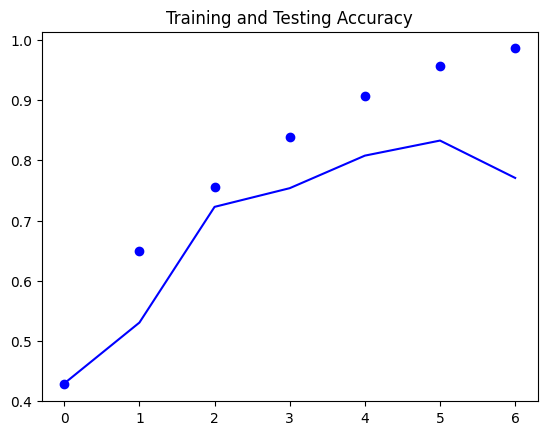

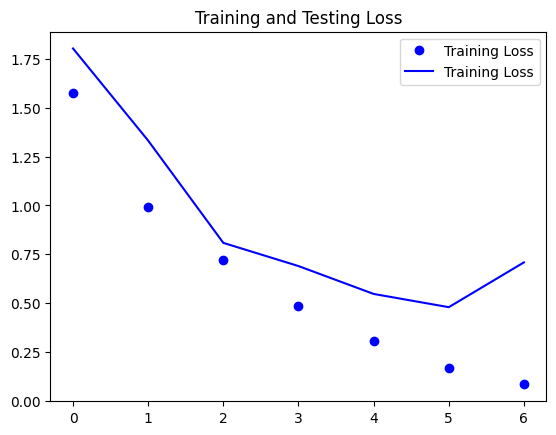

In [3]:
model.train("/home/mspt5/Documents/homework/IML/project/dataset/mel_format", "/home/mspt5/Documents/homework/IML/project/dataset/mel_test", 7)

In [4]:
model.save_model()

In [5]:
model.load_model()

In [28]:
import numpy as np
import librosa

y, sr = librosa.load("../dataset/audio_format/classical/classical.00001.wav")

spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
pic = librosa.power_to_db(spectrogram, ref=np.max)

duration = len(y) / sr

model.predict(spectrogram, duration)

1/1 [==============================] - 0s 17ms/step
[[7.9610950e-04 2.9614806e-01 7.1856324e-05 1.3669914e-03 3.4356394e-03
  3.6472273e-01 1.4836933e-02 9.2620738e-03 4.0824330e-04 3.0895135e-01]]


'Unknown'

In [7]:
import librosa

# 加载音频文件
audio_file = '../dataset/audio_format/blues/blues.00000.wav'  # 替换为您的音频文件路径
y, sr = librosa.load(audio_file)

# 1. 音高和旋律特征
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# 2. 节奏和节拍
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 3. 和声和和弦结构
harmonic = librosa.effects.harmonic(y)
harmonic_features = librosa.feature.chroma_cqt(y=harmonic, sr=sr)

# 4. 音色和乐器使用
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# 5. 动态范围和强度
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

# 6. 时间结构和形式
temporal_onset = librosa.onset.onset_strength(y=y, sr=sr)

# 7. 时域特征
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# 输出每个特征的shape
print("Chroma (Pitch):", chroma.shape)
print("Tempo (Rhythm):", beat_times.shape)
print("Harmonic Features (Harmony):", harmonic_features.shape)
print("MFCCs (Timbre):", mfccs.shape)
print("RMS (Dynamics):", rms.shape)
print("Temporal Onset (Form):", temporal_onset.shape)
print("Zero Crossing Rate (Time-domain):", zero_crossing_rate.shape)

Chroma (Pitch): (12, 1293)
Tempo (Rhythm): (61,)
Harmonic Features (Harmony): (12, 1293)
MFCCs (Timbre): (20, 1293)
RMS (Dynamics): (1, 1293)
Temporal Onset (Form): (1293,)
Zero Crossing Rate (Time-domain): (1, 1293)
